In [123]:
#les import
from pymatgen import Structure
from pymatgen.ext.matproj import MPRester
import matplotlib.pyplot as plt
import numpy as np
from pymatgen.electronic_structure.plotter import BSPlotter

In [124]:
#télécharger la structure de bandes électroniques du matériau
with MPRester("2a0sQXpqwWhCvNGk") as m:
    structure = m.get_structure_by_material_id("mp-2247")
    bandes = m.get_bandstructure_by_material_id("mp-2784")

La bande interdite est de 2.03 eV.
la bande interdite est directe
le vecteur de transition est \Gamma-\Gamma


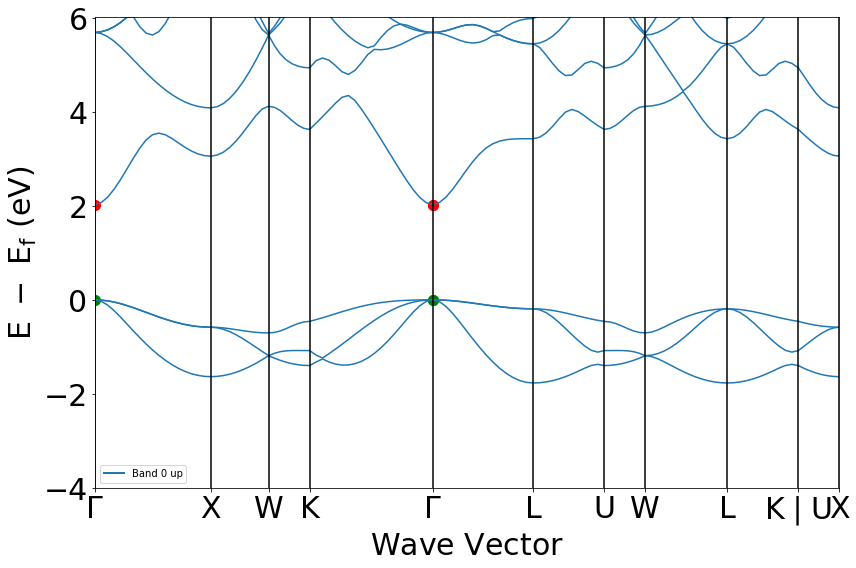

In [125]:
#Déterminer la bande interdite
bsplot = BSPlotter(bandes)
bsplot.get_plot(vbm_cbm_marker=True)
band_gap = bandes.get_band_gap()
print("La bande interdite est de {:.2f} eV.".format(band_gap["energy"]))
direct = band_gap.get("direct")
if(direct == True):
    print("la bande interdite est directe")
else:
    print("la bande interdire est indirecte")
print("le vecteur de transition est {}".format(band_gap['transition']))

On remarque donc que le cristal possède une bande interdite directe d'énergie égale à 2.03 eV. Cette énergie est supérieur à 1 eV et donc notre cristal est un isolant électrique. On voit sur le graphe que la bande interdite est bien directe car l'extremum de la bande de conduction (les points rouges) se trouve au même endroit que l'extremum de la bande de valence (les points verts). Le vecteur de transition est d'ailleurs Gamma-Gamma.

La dispersion est le phénomène par lequel la vitesse de phase d'une onde dépend de sa fréquence (la matière est un milieu dispersif). Par conséquent, ce phénomère dépend aussi de la variation d'énergie de k, le vecteur d'onde. Nous allons déterminer les pentes maximales et minimales des branches trouver la direction dans laquelle la dernière (première) bande de valence (conduction) présente le plus et le moins de dispersion.

Dernière bande de valence : defaultdict(<class 'list'>, {<Spin.up: 1>: [7, 8, 9]})
Première bande de conduction : defaultdict(<class 'list'>, {<Spin.up: 1>: [10]})

La dispersion maximale dans la bande de valence correspond à la pente de  0.847588252226369 dans la direction W-L et est représentée par la flèche rouge.
La dispersion minimale dans la bande de valence correspond à la pente de  0.2575832516793201 dans la direction Γ-L et est représentée par la flèche bleue.
La dispersion maximale dans la bande de conduction correspond à la pente de  2.479244163338627 dans la direction X-W et est représentée par la flèche verte.
La dispersion minimale dans la bande de conduction correspond à la pente de  0.37761425566251966 dans la direction L-U et est représentée par la flèche jaune.
Strucure montrant les directions dans laquelle la dernière bande de valence et la première bande de conduction présentent le plus et le moins de dispersion


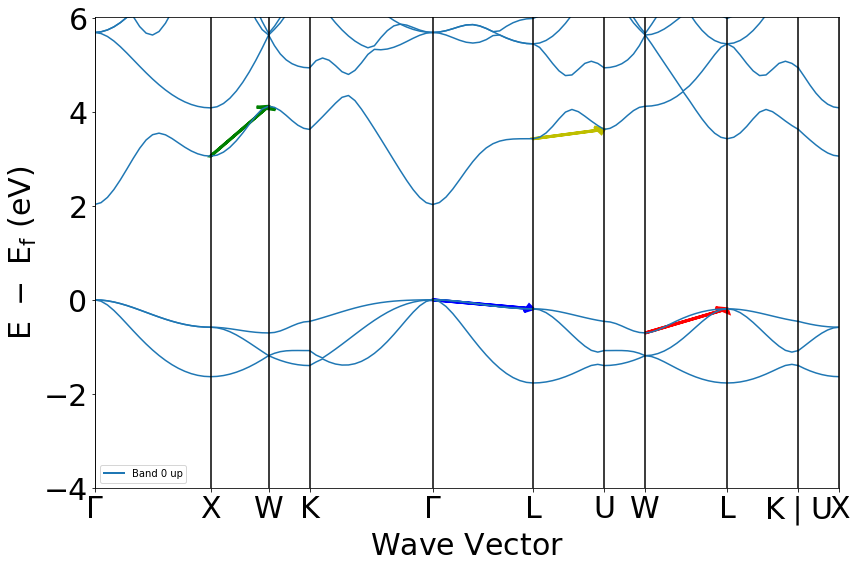

In [126]:
#Trouver la direction dans laquelle la dernière (première) bande de valence (conduction) présente le plus et le moins de 
#dispersion(insérer une figure indiquant la dispersion par des flèches)
data = bsplot.bs_plot_data()
Energy = data.get('energy').get('1')
Dist = data.get('ticks').get('distance')

#obtenir la dernière bande de valence et la première bande de conduction
first_conduction = bandes.get_cbm()
last_valence = bandes.get_vbm()

plot = bsplot.get_plot()

print("Dernière bande de valence : {}".format(last_valence["band_index"]))
print("Première bande de conduction : {}\n".format(first_conduction["band_index"]))

v_index = 9
c_index = 10

slope_v = np.zeros(10)
slope_c = np.zeros(10)
Distuni = np.unique(Dist)

for i in range(10):
    DeltaD = Distuni[i+1] - Distuni[i]
    slope_v[i] = abs(((Energy[i][v_index])[-1] - (Energy[i][v_index])[0])/(DeltaD))
    slope_c[i] = abs(((Energy[i][c_index])[-1] - (Energy[i][c_index])[0])/(DeltaD))
    
max_v = np.argmax(slope_v) 
min_v = np.argmin(slope_v) 

max_c = np.argmax(slope_c) 
min_c = np.argmin(slope_c) 

print("La dispersion maximale dans la bande de valence correspond à la pente de ",np.max(slope_v),"dans la direction W-L et est représentée par la flèche rouge.")
print("La dispersion minimale dans la bande de valence correspond à la pente de ",np.min(slope_v),"dans la direction Γ-L et est représentée par la flèche bleue.")

print("La dispersion maximale dans la bande de conduction correspond à la pente de ",np.max(slope_c),"dans la direction X-W et est représentée par la flèche verte.")
print("La dispersion minimale dans la bande de conduction correspond à la pente de ",np.min(slope_c),"dans la direction L-U et est représentée par la flèche jaune.")

plt.arrow(Distuni[max_v], (Energy[max_v][v_index])[0], Distuni[max_v+1] - Distuni[max_v], (Energy[max_v][v_index])[-1] - (Energy[max_v][v_index])[0], head_width=0.15, head_length=0.05, linewidth=3, color='r', length_includes_head=True)
plt.arrow(Distuni[min_v], (Energy[min_v][v_index])[0], Distuni[min_v+1] - Distuni[min_v], (Energy[min_v][v_index])[-1] - (Energy[min_v][v_index])[0], head_width=0.15, head_length=0.05, linewidth=3, color='b', length_includes_head=True)

plt.arrow(Distuni[max_c], (Energy[max_c][c_index])[0], Distuni[max_c+1] - Distuni[max_c], (Energy[max_c][c_index])[-1] - (Energy[max_c][c_index])[0], head_width=0.15, head_length=0.05, linewidth=3, color='g', length_includes_head=True)
plt.arrow(Distuni[min_c], (Energy[min_c][c_index])[0], Distuni[min_c+1] - Distuni[min_c], (Energy[min_c][c_index])[-1] - (Energy[min_c][c_index])[0], head_width=0.15, head_length=0.05, linewidth=3, color='y', length_includes_head=True)

print("Strucure montrant les directions dans laquelle la dernière bande de valence et la première bande de conduction présentent le plus et le moins de dispersion")
plt.show()

La masse effective au sommet (base) de la dernière (première) bande de valence (conduction) en supposant une dispersion parabolique peut se calculer avec cette formule : \[$m*$ = \frac{$\hbar * k^2$}{$2*E(k)$}\]


In [127]:
#calculer la masse effective au sommet (base) de la dernière (première) bande de valence (conduction) en supposant
#une dispersion parabolique
h_bar = 1.05456e-34

#Calcul des composantes du vecteur d'onde k 
v_kpoint = np.linalg.norm(last_valence['kpoint'].cart_coords + a )*1e10   #mètres^(-1)
c_kpoint = np.linalg.norm(first_conduction['kpoint'].cart_coords + a)*1e10  #mètres^(-1)

#Energies des bandes de valence et de conduction
Energy_val = last_valence['energy'] * 1.602177e-19    #J
Energy_con = first_conduction['energy'] * 1.602177e-19   #J

# Calcul des masses effectives en supposant une dispersion parabolique
m_valence = (hbar**2 * v_kpoint**2)/(2*Energy_val)   #kg
m_conduction = (hbar**2 * c_kpoint**2)/(2*Energy_con)   #kg


print("La masse effective au sommet de la dernière bande de valence : {} kg".format(m_valence))
print("La masse effective à la base de la première bande de conduction : {} kg".format(m_conduction))



La masse effective au sommet de la dernière bande de valence : 3.322034525990142e-29 kg
La masse effective à la base de la première bande de conduction : 8.244761792379181e-30 kg
